In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Matplotlib project/netflix_tv_shows_detailed_up_to_2025.csv")
print(df.head())

   show_id     type              title director  \
0    33238  TV Show        Running Man      안재철   
1    32415  TV Show              Conan      NaN   
2    37757  TV Show  MasterChef Greece      NaN   
3    75685  TV Show         Prostřeno!      NaN   
4    33847  TV Show           The Talk      NaN   

                                                cast  \
0  Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...   
1                        Conan O'Brien, Andy Richter   
2                                                NaN   
3                        Václav Vydra, Jana Boušková   
4  Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...   

                             country  date_added  release_year  rating  \
0                        South Korea  2010-07-11          2010   8.241   
1           United States of America  2010-11-08          2010   7.035   
2                             Greece  2010-10-03          2010   5.600   
3                     Czech Republic  2010-03-01          20

type
TV Show    14203
Name: count, dtype: int64


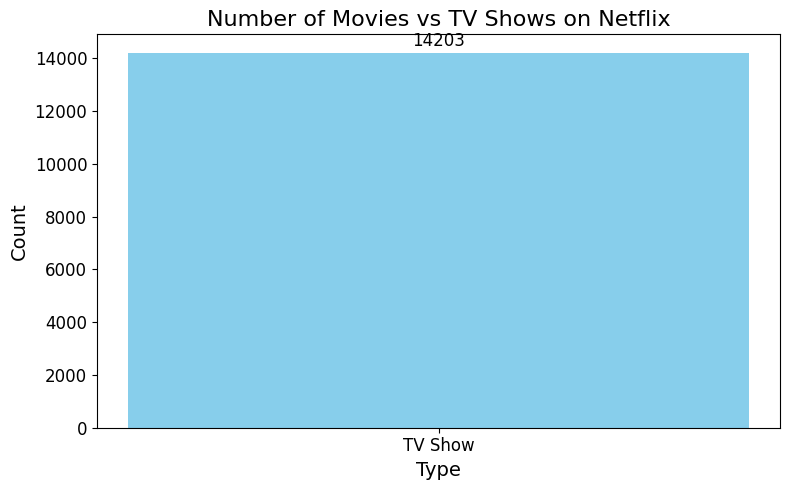

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load dataset
df = pd.read_csv(r"C:\Matplotlib project\netflix_tv_shows_detailed_up_to_2025.csv")

# Drop rows with missing important columns
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

# Count number of Movies and TV Shows
type_counts = df['type'].value_counts()
print(type_counts)  # Show exact counts in console

#  Plot bar chart 
plt.figure(figsize=(8,5))
bars = plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'pink'])

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(plt.title('Number of Movies vs TV Shows on Netflix', fontsize=16)
fontsize=12)

plt.tight_layout()
plt.savefig('Movies_VS_Tvshows_linear.png')
plt.show()

plt.tight_layout()
plt.savefig('Movies_VS_Tvshows_linear.png')
plt.show()


C:\Users\sonal\AppData\Local\Temp\ipykernel_2524\96776981.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  top_ratings = rating_counts[:5]
C:\Users\sonal\AppData\Local\Temp\ipykernel_2524\96776981.py:9: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  others_count = rating_counts[5:].sum()


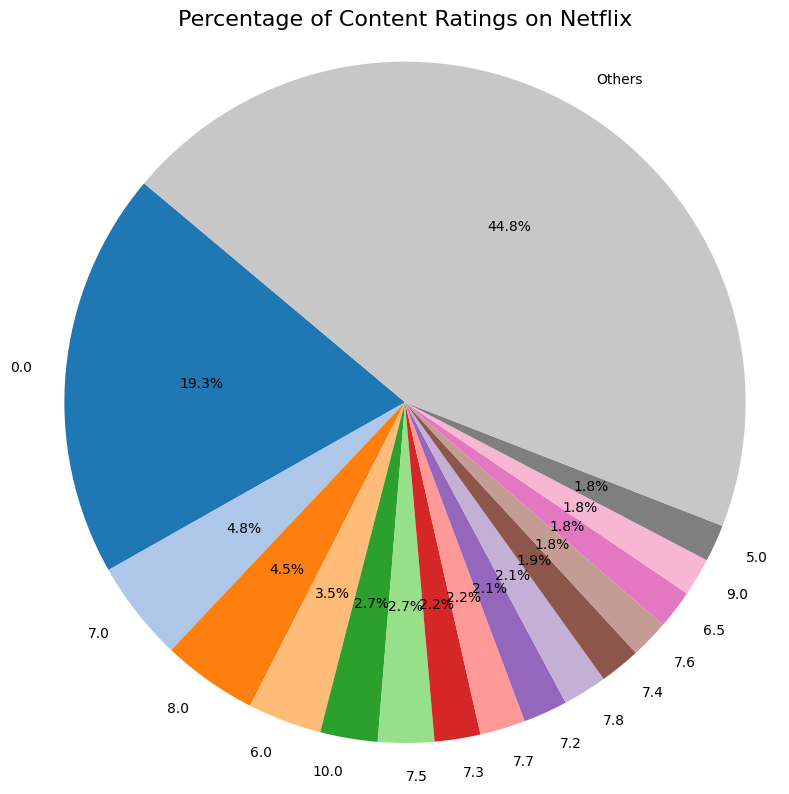

In [ ]:
# Drop missing ratings
df = df.dropna(subset=['rating'])

# Count content ratings
rating_counts = df['rating'].value_counts()

# Keep top 5 ratings, group the rest as "Others" since it contains too many ratings
top_ratings = rating_counts[:5]
others_count = rating_counts[5:].sum()

# Combine into a new Series
final_counts = pd.concat([top_ratings, pd.Series({'Others': others_count})])

# Plot Pie Chart
plt.figure(figsize=(8,8))
plt.pie(final_counts.values, labels=final_counts.index, 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

plt.title('Percentage of Content Ratings on Netflix', fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.savefig('Content_Ratings_PieChart.png')
plt.show()


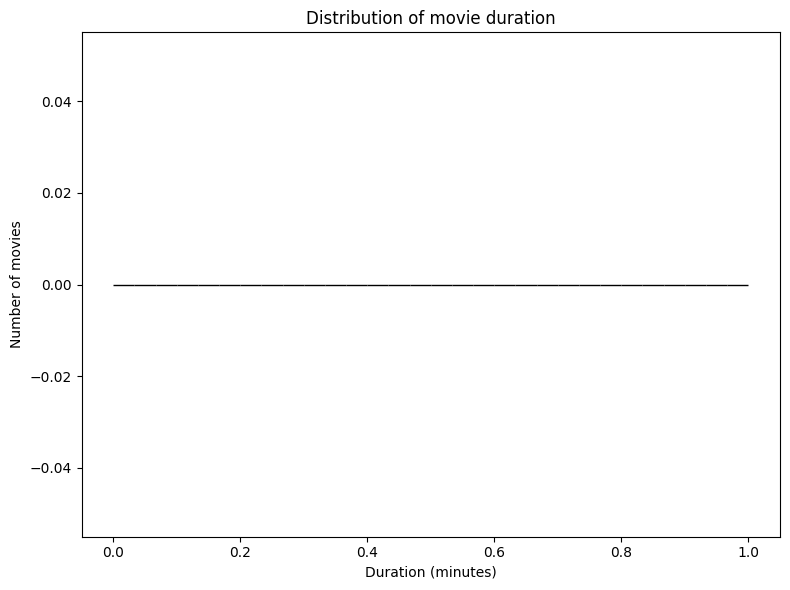

In [19]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of movie duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

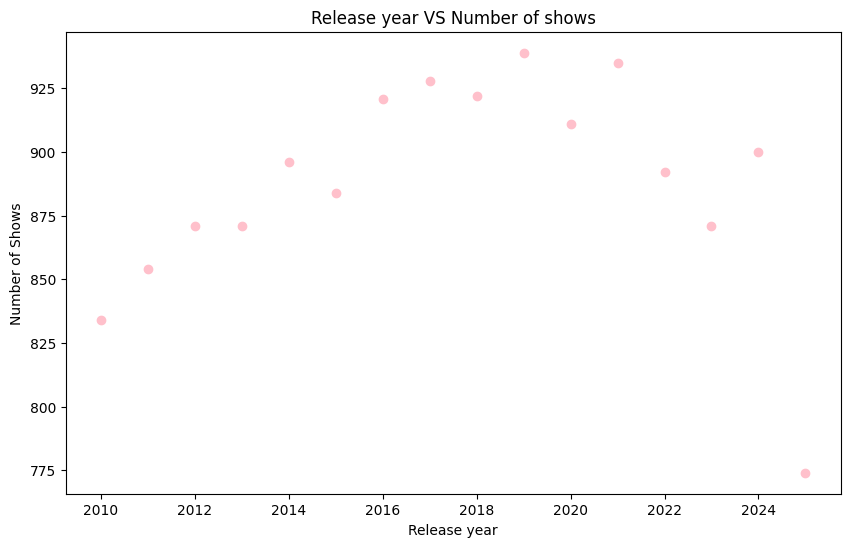

In [23]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='pink')
plt.title('Release year VS Number of shows')
plt.xlabel('Release year')
plt.ylabel('Number of Shows')
plt.savefig('release_year_scatter.png')
plt.show()

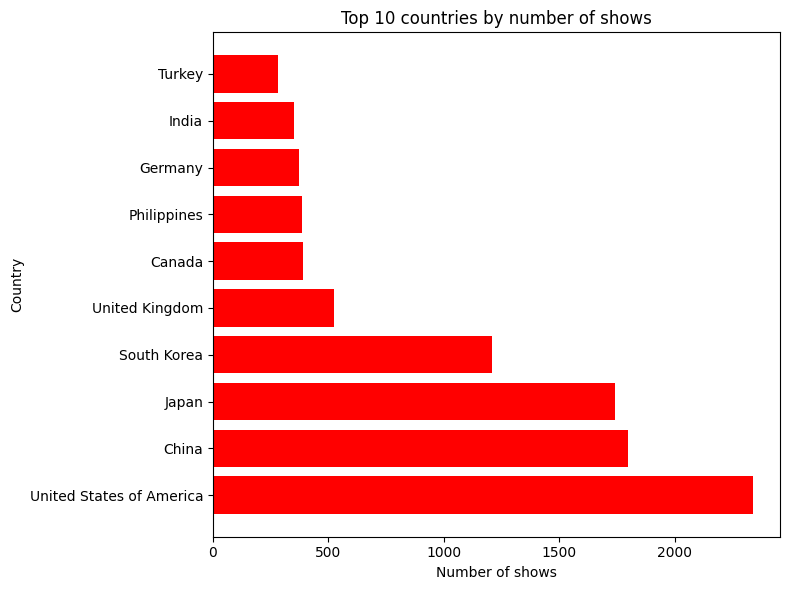

In [25]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='red')
plt.title('Top 10 countries by number of shows')
plt.xlabel('Number of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries_barh.png')
plt.show()

Detected columns in content_by_year:
Index(['TV Show'], dtype='object', name='type')
['TV Show']
Detected columns: Movie -> None, TV Show -> TV Show


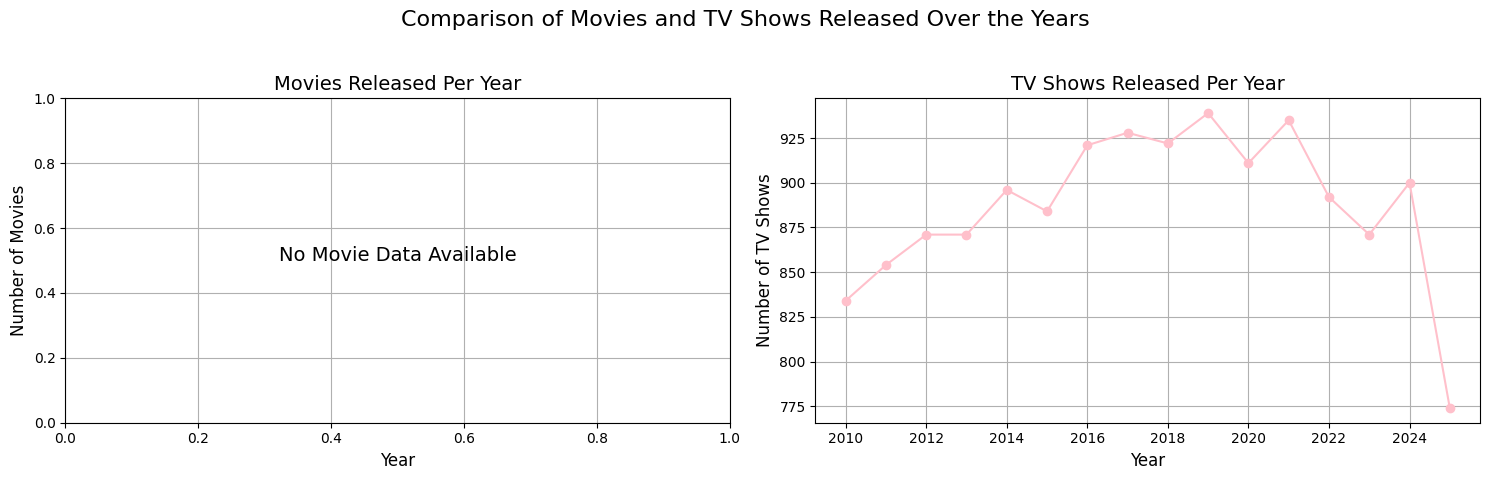

In [ ]:
# Print detected columns
print("Detected columns in content_by_year:")
print(content_by_year.columns)
print([col for col in content_by_year.columns])

# Try to detect columns
movie_col = next((col for col in content_by_year.columns if 'movie' in col.lower()), None)
tvshow_col = next((col for col in content_by_year.columns if 'tv' in col.lower()), None)

print(f"Detected columns: Movie -> {movie_col}, TV Show -> {tvshow_col}")

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15,5))

if movie_col:
    ax[0].plot(content_by_year.index, content_by_year[movie_col], color='blue', marker='o')
    ax[0].set_title('Movies Released Per Year', fontsize=14)
    ax[0].set_xlabel('Year', fontsize=12)
    ax[0].set_ylabel('Number of Movies', fontsize=12)
    ax[0].grid(True)
else:
    ax[0].text(0.5, 0.5, 'No Movie Data Available', fontsize=14, ha='center')
    ax[0].set_title('Movies Released Per Year', fontsize=14)
    ax[0].set_xlabel('Year', fontsize=12)
    ax[0].set_ylabel('Number of Movies', fontsize=12)
    ax[0].grid(True)

if tvshow_col:
    ax[1].plot(content_by_year.index, content_by_year[tvshow_col], color='pink', marker='o')
    ax[1].set_title('TV Shows Released Per Year', fontsize=14)
    ax[1].set_xlabel('Year', fontsize=12)
    ax[1].set_ylabel('Number of TV Shows', fontsize=12)
    ax[1].grid(True)
else:
    ax[1].text(0.5, 0.5, 'No TV Show Data Available', fontsize=14, ha='center')
    ax[1].set_title('TV Shows Released Per Year', fontsize=14)
    ax[1].set_xlabel('Year', fontsize=12)
    ax[1].set_ylabel('Number of TV Shows', fontsize=12)
    ax[1].grid(True)

fig.suptitle('Comparison of Movies and TV Shows Released Over the Years', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('movies_tvshows_comparison_fixed_debug.png')
plt.show()
